In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
from PIL import Image

In [2]:
train_dir='train'
validate_dir='valid'
test_dir='test'

In [3]:
# Creating training image data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagenerator = ImageDataGenerator(
    
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    
)

In [4]:
# Validation image generator

val_imagenerator = ImageDataGenerator(rescale=1.0/255)

In [5]:
train_generator = train_imagenerator.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'
)


Found 12594 images belonging to 100 classes.


In [6]:
validation_generator = val_imagenerator.flow_from_directory(
    validate_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'
)

Found 500 images belonging to 100 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 28
image_size = (224, 224)

# Create ImageDataGenerator
train_imagenerator = ImageDataGenerator(
    rescale=1.0/255,   # Normalize pixel values to [0, 1]
    # You can add other data augmentation options here
)

# Create a tf.data.Dataset using image_dataset_from_directory
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=45,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    validate_dir,
    seed=45,
    shuffle=False,
    image_size=image_size,
    batch_size=batch_size
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=45,           # Seed for reproducibility
    shuffle=False,       # Shuffle the dataset during training
    image_size=(224, 224),   # Resize images to specified dimensions
    batch_size=batch_size   # Divide data into batches of specified size
)


Found 12594 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [8]:
class_names = train_data.class_names
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', 'Iphiclus si

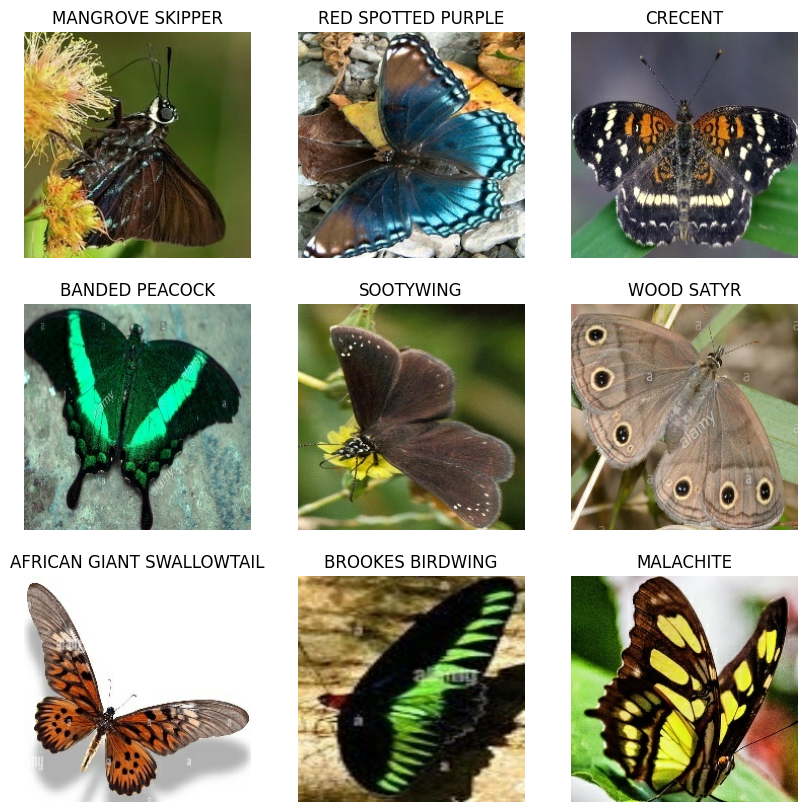

In [9]:
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

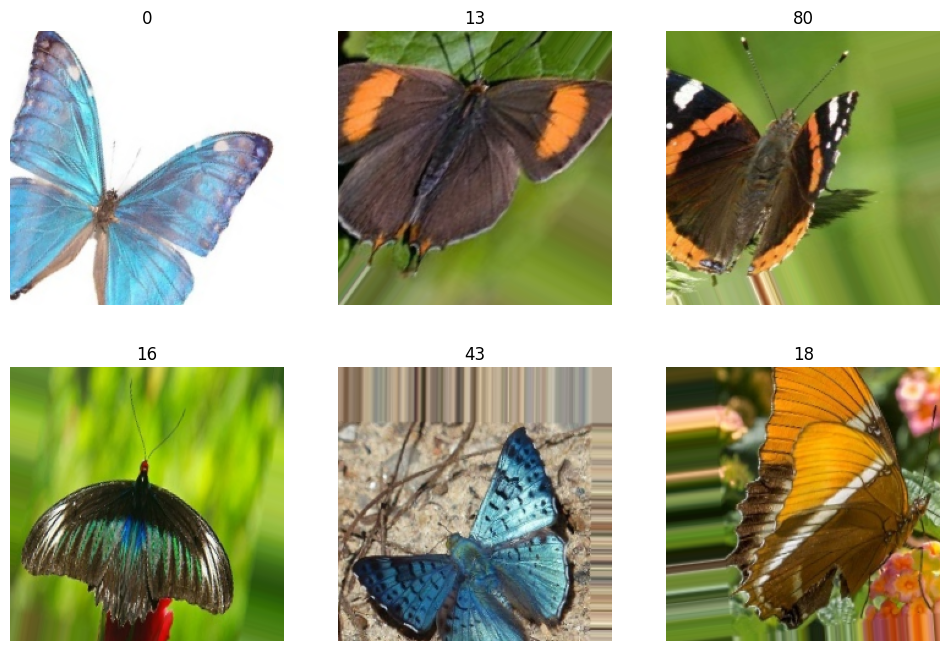

In [10]:
augmented_images, labels = train_generator.next()

plt.figure(figsize=(12, 8))
for i in range(min(6, augmented_images.shape[0])):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(int(np.argmax(labels[i])))  # Convert one-hot encoded label to integer category
    plt.axis("off")

In [11]:
class_names = train_data.class_names
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', 'Iphiclus si

In [12]:
model = Sequential()
pretrained_base_model = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False, # Drop imagenet classifier on the top
    input_shape=(224,224,3),
    pooling = 'avg',
    classes=100

)

In [13]:
for layer in pretrained_base_model.layers:
  layer.trainable = False

In [14]:
model.add(pretrained_base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(100, activation='softmax'))

In [15]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
pretrained_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 24,688,100
Trainable params: 1,100,388
Non-trainable params: 23,587,712
_________________________________________________________________


In [18]:
# Define the input shape
inputs = pretrained_base_model.input

# stack the inputs to pretrained model and set training to false
x = pretrained_base_model.output

# Add a pooling layer


# Add drop out layer

x = tf.keras.layers.Dropout(0.4)(x)

# Last output dense layer with 1 unit and sigmoid
output = tf.keras.layers.Dense(100, activation='softmax')(x)

# Build a model
model_3=Model(inputs=inputs, outputs=output)

In [19]:
pretrained_base_model.trainable = True
print("Number of layers in the base Mnet model: ", len(pretrained_base_model.layers))

Number of layers in the base Mnet model:  176


In [20]:
for layer in pretrained_base_model.layers:
  layer.trainable = True

In [21]:
for layer in pretrained_base_model.layers[:100]:
    layer.trainable = False

In [22]:
model_3.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']

)

In [23]:
batch_size = 28

print("Available GPUs:", tf.config.list_physical_devices('GPU'))

historyyyy = model_3.fit(
      train_data,
      epochs=10,
      validation_data=val_data,
      )

Available GPUs: []
Epoch 1/10


x:\trash\envs\tf_gpu\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


450/450 [==============================] - 583s 1s/step - loss: 1.2312 - accuracy: 0.7044 - val_loss: 5.3586 - val_accuracy: 0.4320
Epoch 2/10
450/450 [==============================] - 561s 1s/step - loss: 0.3531 - accuracy: 0.9050 - val_loss: 0.6146 - val_accuracy: 0.8620
Epoch 3/10
450/450 [==============================] - 573s 1s/step - loss: 0.1794 - accuracy: 0.9483 - val_loss: 0.3113 - val_accuracy: 0.9380
Epoch 4/10
450/450 [==============================] - 566s 1s/step - loss: 0.0986 - accuracy: 0.9724 - val_loss: 0.5043 - val_accuracy: 0.8900
Epoch 5/10
450/450 [==============================] - 585s 1s/step - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.3490 - val_accuracy: 0.9300
Epoch 6/10
450/450 [==============================] - 583s 1s/step - loss: 0.0400 - accuracy: 0.9886 - val_loss: 0.3726 - val_accuracy: 0.9440
Epoch 7/10
450/450 [==============================] - 578s 1s/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.3255 - val_accuracy: 0.9360
Epoch 8/10

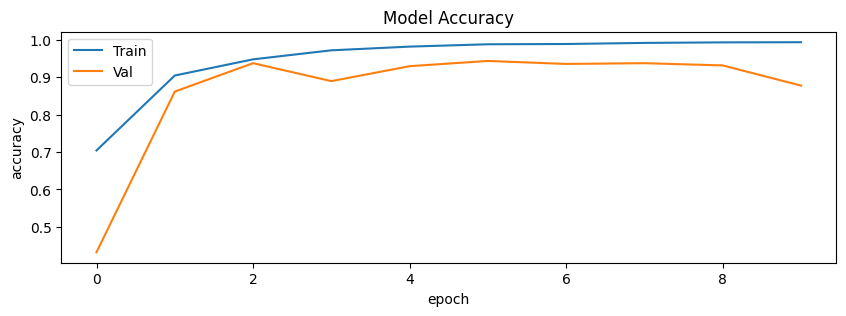

In [24]:
plt.figure(figsize=(10,3))
plt.plot(historyyyy.history['accuracy'])
plt.plot(historyyyy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [29]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input

# List only the image filenames from the test directory and its subdirectories
test_filenames = []
true_labels = []  # To store true labels

for root, dirs, files in os.walk(test_dir):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            test_filenames.append(os.path.join(root, filename))
            true_labels.append(os.path.basename(root))  # Folder name as the true label

class_labels = sorted(os.listdir(train_dir))
ids = []
predictions = []

for img_path in test_filenames:
    img_name = os.path.basename(img_path)  # Extract only the image name
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model_3.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    
    ids.append("test" + fr"\{''}" + img_name)  # Use raw string literal
    predictions.append(predicted_class)

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions, labels=class_labels)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Split confusion matrix into chunks of 20 classes
num_classes = len(class_labels)
chunk_size = 20
for i in range(0, num_classes, chunk_size):
    chunk_labels = class_labels[i:i + chunk_size]
    chunk_cm = cm_df.loc[chunk_labels, chunk_labels]
    
    # Plot and save confusion matrix for this chunk
    plt.figure(figsize=(10, 8))
    sns.heatmap(chunk_cm, annot=True, fmt='d', cmap='Blues', xticklabels=chunk_labels, yticklabels=chunk_labels)
    plt.title(f'Confusion Matrix (Classes {i+1}-{i+len(chunk_labels)})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'confusion_matrix_chunk_{i+1}_{i+len(chunk_labels)}.png')
    plt.close()

# Classification Report
report = classification_report(true_labels, predictions, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report.csv')

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = np.trace(cm) / np.sum(cm)
print(f'Accuracy: {accuracy:.4f}')
print(f'Classification Report:')
print(report_df)

# ROC and AUC calculations
if len(class_labels) == 2:  # Binary classification case
    y_true_binary = [1 if label == class_labels[1] else 0 for label in true_labels]
    y_pred_binary = [1 if label == class_labels[1] else 0 for label in predictions]
    fpr, tpr, _ = roc_curve(y_true_binary, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    print(f'ROC AUC: {roc_auc:.4f}')
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.savefig('roc_curve.png')
    plt.close()

# Create and save CSV file with predictions
results_df = pd.DataFrame({'ID': ids, 'True Label': true_labels, 'Prediction': predictions})
results_df.to_csv('predictions.csv', index=False)

print("Confusion matrix, classification report, and metrics have been saved.")


1/1 [==============================] - 0s 62ms/step
Accuracy: 0.8880
Classification Report:
                           precision  recall  f1-score  support
ADONIS                      0.714286   1.000  0.833333    5.000
AFRICAN GIANT SWALLOWTAIL   1.000000   1.000  1.000000    5.000
AMERICAN SNOOT              1.000000   0.800  0.888889    5.000
AN 88                       1.000000   1.000  1.000000    5.000
APPOLLO                     0.625000   1.000  0.769231    5.000
...                              ...     ...       ...      ...
YELLOW SWALLOW TAIL         1.000000   0.800  0.888889    5.000
ZEBRA LONG WING             1.000000   0.800  0.888889    5.000
accuracy                    0.888000   0.888  0.888000    0.888
macro avg                   0.913415   0.888  0.883052  500.000
weighted avg                0.913415   0.888  0.883052  500.000

[103 rows x 4 columns]
Confusion matrix, classification report, and metrics have been saved.


x:\trash\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
x:\trash\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
x:\trash\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
